# Hackaton IT-volontaire 25.07.2022 - 02.08.2022
## Задача 2. Бухгалтерская отчетность
### Ментор — Михаил Белоус

Из Росстата получены данные бухгалтерской отчетности всех действующих на май 2022 года фондов в России:

- Благотворительные фонды (ОКОПФ 070401)
- Общественные фонды (ОКОПФ 070403)
- Экологические фонды (ОКОПФ 070404)

Данные представлены за 2017-2021 годы. Считаем, что если в данных нет сведений по отчетности за какой-то год, это означает, что организация не предоставила отчетность за этот год.

- Очистить и описать данные
- Для тех организаций, которые подали отчетность, узнать, есть ли связь между материальным благополучием фонда и количеством штатных работников
- Определить факторы, влияющие на закредитованность, финансовое благополучие организации
- Любые дополнительные выводы и проверки


Проверяемые гипотезы: 

1. есть ли связь между материальным благополучием фонда и количеством штатных сотрудников? 

       **Определения:** НКО (некоммерческая организация) - Некоммерческой организацией является организация, не имеющая извлечение прибыли в качестве основной цели своей деятельности и не распределяющая полученную прибыль между участниками. Некоммерческие организации могут создаваться для достижения социальных, благотворительных, культурных, образовательных, научных и управленческих целей, в целях охраны здоровья граждан, развития физической культуры и спорта, удовлетворения духовных и иных нематериальных потребностей граждан, защиты прав, законных интересов граждан и организаций, разрешения споров и конфликтов, оказания юридической помощи, а также в иных целях, направленных на достижение общественных благ. Некоммерческие организации могут создаваться в форме общественных или религиозных организаций (объединений), общин коренных малочисленных народов, казачьих обществ, некоммерческих партнерств, учреждений, автономных некоммерческих организаций, социальных, благотворительных и иных **фондов**, ассоциаций и союзов

        т.к. данные по среднесписочной численности работников есть только за 2017, 2018 гг, проверить данную гипотезу возможно только по данным за 2017, 2018 гг. 

Почему взяли именно эти данные:

 - “всего поступило средств” - данный параметр включает в себя такие показатели как: “остаток средств на начало отчетного года” + “вступительные взносы” + “членские взносы” + “целевые взносы” + “добровольные имущественные взносы и пожертвования” + “прибыль от предпринимательской деятельности организации” + “прочие”

если предположить (надо уточнить!), что материальное благополучие фонда - это эквивалент “остатку средств на конец отчетного года”, а выплаты работникам определяются (входят в), как “расходы на содержание аппарата управления”, то расчет мат. благополучия фонда можно рассчитать:

“всего поступило средств” (Excel столбец - EC, ED)- “всего использовано средств” (EW, EX)= “” (). (положительное сальдо на начало следующего отчетного года)

“расходы на целевые мероприятия” (EH, Ei)+ “расходы на содержание аппарата управления” (EM, EN)+ “приобретение основных средств, инвентаря и иного имущества” (ER, ES) + n(расходы) (неопределенная переменная) = “всего использовано средств”

“всего поступило средств” > “расходы на целевые мероприятия” + “расходы на содержание аппарата управления” + “приобретение основных средств, инвентаря и иного имущества” - положительное материальное состояние фонда.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import ttest_ind, shapiro, f_oneway, mannwhitneyu
from statsmodels.stats.proportion import proportions_ztest
pd.set_option('display.max_columns', 200) # показывать больше колонок
pd.set_option('display.max_rows', 200) # показывать большестрок

In [2]:
df = pd.read_excel(r'C:\keys_2\russia.xlsx', sheet_name=1, header=3)
df.sample(15)

,№,Наименование,Регистрационный номер,Дата регистрации,Статус,Код налогоплательщика,Регион регистрации,Код ОКАТО,Наименование ОКАТО,Код ОКТМО,Организационно-правовая форма,Код ОКОПФ,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2019, Среднесписочная численность работников","2020, Среднесписочная численность работников","2021, Среднесписочная численность работников","2017, Доходы, RUB","2018, Доходы, RUB","2019, Доходы, RUB","2020, Доходы, RUB","2021, Доходы, RUB","2017, Расходы, RUB","2018, Расходы, RUB","2019, Расходы, RUB","2020, Расходы, RUB","2021, Расходы, RUB","2017, Дебиторская задолженность, RUB","2018, Дебиторская задолженность, RUB","2019, Дебиторская задолженность, RUB","2020, Дебиторская задолженность, RUB","2021, Дебиторская задолженность, RUB","2017, Денежные средства и денежные эквиваленты, RUB","2018, Денежные средства и денежные эквиваленты, RUB","2019, Денежные средства и денежные эквиваленты, RUB","2020, Денежные средства и денежные эквиваленты, RUB","2021, Денежные средства и денежные эквиваленты, RUB","2017, Капитал и резервы, RUB","2018, Капитал и резервы, RUB","2019, Капитал и резервы, RUB","2020, Капитал и резервы, RUB","2021, Капитал и резервы, RUB","2017, Заёмные средства (краткосрочные), RUB","2018, Заёмные средства (краткосрочные), RUB","2019, Заёмные средства (краткосрочные), RUB","2020, Заёмные средства (краткосрочные), RUB","2021, Заёмные средства (краткосрочные), RUB","2017, Кредиторская задолженность, RUB","2018, Кредиторская задолженность, RUB","2019, Кредиторская задолженность, RUB","2020, Кредиторская задолженность, RUB","2021, Кредиторская задолженность, RUB","2017, Пассивы всего, RUB","2018, Пассивы всего, RUB","2019, Пассивы всего, RUB","2020, Пассивы всего, RUB","2021, Пассивы всего, RUB","2017, Выручка, RUB","2018, Выручка, RUB","2019, Выручка, RUB","2020, Выручка, RUB","2021, Выручка, RUB","2017, Себестоимость продаж, RUB","2018, Себестоимость продаж, RUB","2019, Себестоимость продаж, RUB","2020, Себестоимость продаж, RUB","2021, Себестоимость продаж, RUB","2017, Валовая прибыль (убыток), RUB","2018, Валовая прибыль (убыток), RUB","2019, Валовая прибыль (убыток), RUB","2020, Валовая прибыль (убыток), RUB","2021, Валовая прибыль (убыток), RUB","2017, Коммерческие расходы, RUB","2018, Коммерческие расходы, RUB","2019, Коммерческие расходы, RUB","2020, Коммерческие расходы, RUB","2021, Коммерческие расходы, RUB","2017, Управленческие расходы, RUB","2018, Управленческие расходы, RUB","2019, Управленческие расходы, RUB","2020, Управленческие расходы, RUB","2021, Управленческие расходы, RUB","2017, Прибыль (убыток) от продажи, RUB","2018, Прибыль (убыток) от продажи, RUB","2019, Прибыль (убыток) от продажи, RUB","2020, Прибыль (убыток) от продажи, RUB","2021, Прибыль (убыток) от продажи, RUB","2017, Доходы от участия в других организациях, RUB","2018, Доходы от участия в других организациях, RUB","2019, Доходы от участия в других организациях, RUB","2020, Доходы от участия в других организациях, RUB","2021, Доходы от участия в других организациях, RUB","2017, Проценты к получению, RUB","2018, Проценты к получению, RUB","2019, Проценты к получению, RUB","2020, Проценты к получению, RUB","2021, Проценты к получению, RUB","2017, Проценты к уплате, RUB","2018, Проценты к уплате, RUB","2019, Проценты к уплате, RUB","2020, Проценты к уплате, RUB","2021, Проценты к уплате, RUB","2017, Прочие доходы, RUB","2018, Прочие доходы, RUB","2019, Прочие доходы, RUB","2020, Прочие доходы, RUB","2021, Прочие доходы, RUB","2017, Прочие расходы, RUB","2018, Прочие расходы, RUB","2019, Прочие расходы, RUB","2020, Прочие расходы, RUB","2021, Прочие расходы, RUB","2017, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) до налогообложения , RUB","2019, Прибыль (убыток) до налогообложения , RUB","2020, Прибыль (убыток) до налогообложения , RUB","2021, Прибыль (убыток) до налогообложения , RUB","2017, Текущий налог на прибыль, RUB","2018, Текущий налог

In [3]:
df.dtypes

№                                                                                 int64
Наименование                                                                     object
Регистрационный номер                                                           float64
Дата регистрации                                                         datetime64[ns]
Статус                                                                           object
Код налогоплательщика                                                           float64
Регион регистрации                                                               object
Код ОКАТО                                                                         int64
Наименование ОКАТО                                                               object
Код ОКТМО                                                                       float64
Организационно-правовая форма                                                    object
Код ОКОПФ                       

### Удаляем ненужные признаки

In [4]:
df.drop(['№', 'Регион регистрации', 'Код ОКАТО', 'Код ОКТМО', 'Код ОКОПФ', 'Код налогоплательщика'], axis=1, inplace=True)
df.shape


(7525, 156)

## Смотрим на пропуски

In [5]:
df.isnull().sum()-7525 #таким методом проверяем коичество заполненных столбцов
#видно что в некоторых столбцах вообще нет значений 

Наименование                                                            -7525
Регистрационный номер                                                   -7517
Дата регистрации                                                        -7525
Статус                                                                  -7525
Наименование ОКАТО                                                      -7525
Организационно-правовая форма                                           -7525
2017, Среднесписочная численность работников                            -2122
2018, Среднесписочная численность работников                              -29
2019, Среднесписочная численность работников                                0
2020, Среднесписочная численность работников                                0
2021, Среднесписочная численность работников                                0
2017, Доходы, RUB                                                           0
2018, Доходы, RUB                                               

## Выделим из признака "Наименование ОКАТО" отдельно каждый город

In [6]:
def get_parse_direction(location):
    location = location.split(', ')[1:]
    if len(location):
        return location[0]
    else:
        return ''

In [7]:
df['direction'] = df['Наименование ОКАТО'].apply(get_parse_direction)
df.drop(['Наименование ОКАТО'], axis=1, inplace=True)

In [8]:
df[['direction']].sample(15)

,direction
1835,Тверь
6960,Похвистнево
927,Московский
4644,Химки
7272,Туймазы
6561,Бийск
7184,Ростов-на-Дону
5792,Рубцовск
6551,Новосибирск
6629,Гагаринский


In [40]:
df["Организационно-правовая форма"].value_counts()

Благотворительные фонды     6365
Общественные фонды          1111
Экологические фонды           28
Фонды                         16
Общественные организации       5
Name: Организационно-правовая форма, dtype: int64

### Преобразуем признак с численностью сотрудников в удобный вид

In [9]:
df['2017, Среднесписочная численность работников'].value_counts(),df['2018, Среднесписочная численность работников'].value_counts()

(0 - 5        1947
 11 - 15        82
 6 - 10         67
 51 - 100       21
 101 - 150       3
 151 - 200       2
 Name: 2017, Среднесписочная численность работников, dtype: int64,
 51 - 100     22
 101 - 150     4
 201 - 250     2
 151 - 200     1
 Name: 2018, Среднесписочная численность работников, dtype: int64)

In [10]:
def get_employees(persons):
    if persons == 0:
        return 0
    if persons == '0 - 5':
        return 5
    elif persons == '6 - 10':
        return 10
    elif persons == '51 - 100':
        return 100
    elif persons == '101 - 150':
        return 150
    elif persons == '151 - 200':
        return 200
    elif persons == '201 - 250':
        return 250
    elif persons == '201 - 250':
        return 250


In [11]:
df['2017 employees'] = df['2017, Среднесписочная численность работников'].apply(get_employees)
df['2018 employees'] = df['2018, Среднесписочная численность работников'].apply(get_employees)
display(df[['2018 employees']].dropna(),df[['2017 employees']].dropna()) #результат


,2018 employees
122,100.0
190,100.0
234,100.0
931,100.0
1609,100.0
1790,100.0
1934,100.0
2294,200.0
2394,150.0
3124,150.0


,2017 employees
2,5.0
8,5.0
15,5.0
23,5.0
28,5.0
...,...
7512,5.0
7513,10.0
7516,5.0
7517,5.0


'mediana2018'

100.0

'mediana2017'

5.0

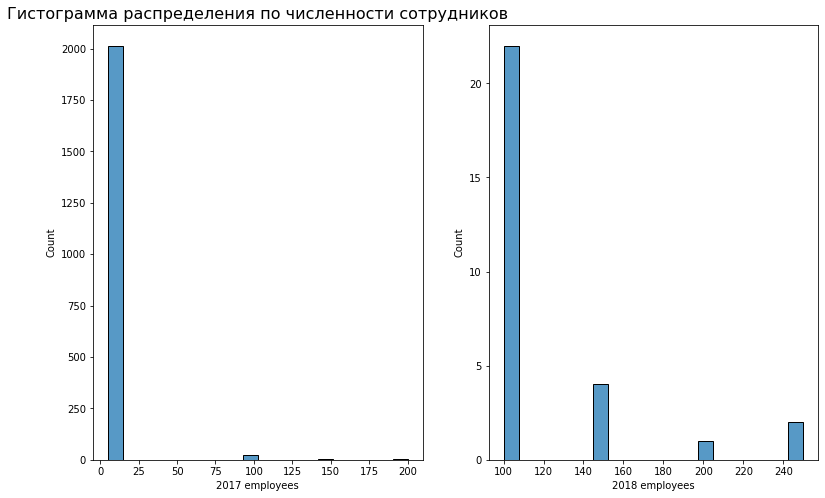

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 8))
sns.histplot(
    data=df,
    x='2017 employees',
    bins=20, #kde=True,
    ax=axes[0]
);

sns.histplot(
    data=df,
    x='2018 employees',
    bins=20, #kde=True,
    ax=axes[1]
);
axes[0].set_title('Гистограмма распределения по численности сотрудников', fontsize=16)
display('mediana2018',df['2018 employees'].dropna().median(),'mediana2017',df['2017 employees'].dropna().median())


# Проверяем гипотезу 

In [71]:
df['q2017_well_being2'] = (df['2017, Всего поступило средств, RUB'] - df['2017, Всего использовано средств, RUB'])/1e9
    
df['2018_well_being2'] = (df['2018, Всего поступило средств, RUB'] - df['2018, Всего использовано средств, RUB'])/1e9

In [72]:
IQR = df['q2017_well_being2'].quantile(0.75) - df['q2017_well_being2'].quantile(0.25)
perc25 = df['q2017_well_being2'].quantile(0.25)
perc75 = df['q2017_well_being2'].quantile(0.75)
df['q2017_well_being2'] = df.q2017_well_being2[df.q2017_well_being2.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]
df['q2017_well_being2']=df.q2017_well_being2.fillna(df.q2017_well_being2.median())

Благотворительные фонды     6365
Общественные фонды          1111
Экологические фонды           28
Фонды                         16
Общественные организации       5
Name: Организационно-правовая форма, dtype: int64

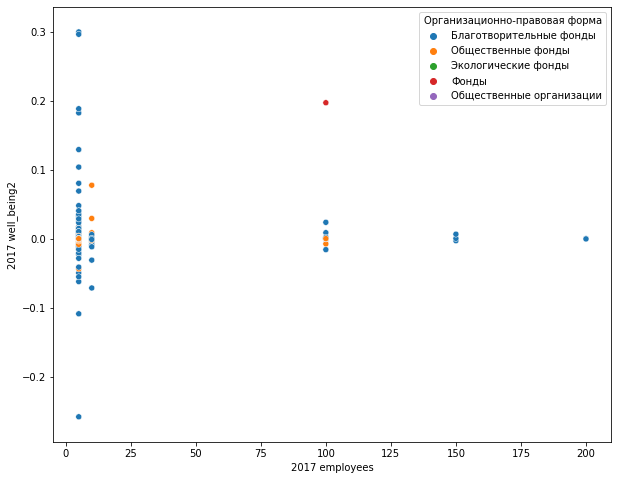

In [78]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
sns.scatterplot(
    x="2017 employees",
    y="2017 well_being2",
    hue="Организационно-правовая форма", 
    data=df);
df["Организационно-правовая форма"].value_counts()

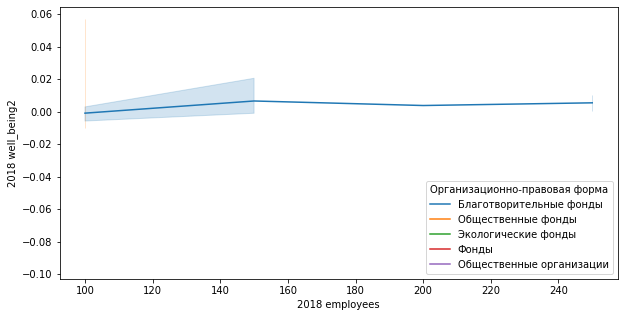

In [77]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.lineplot(
    x="2018 employees",
    y="2018 well_being2",
    hue="Организационно-правовая форма", 
    data=df);

Благотворительные фонды     6365
Общественные фонды          1111
Экологические фонды           28
Фонды                         16
Общественные организации       5
Name: Организационно-правовая форма, dtype: int64

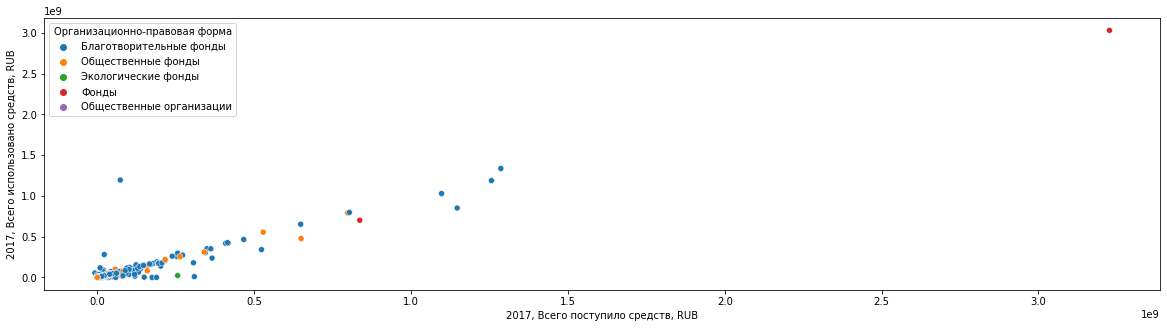

In [58]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
sns.scatterplot(
    x="2017, Всего поступило средств, RUB",
    y="2017, Всего использовано средств, RUB",
    hue="Организационно-правовая форма", 
    data=df);
df["Организационно-правовая форма"].value_counts()

Благотворительные фонды     6365
Общественные фонды          1111
Экологические фонды           28
Фонды                         16
Общественные организации       5
Name: Организационно-правовая форма, dtype: int64

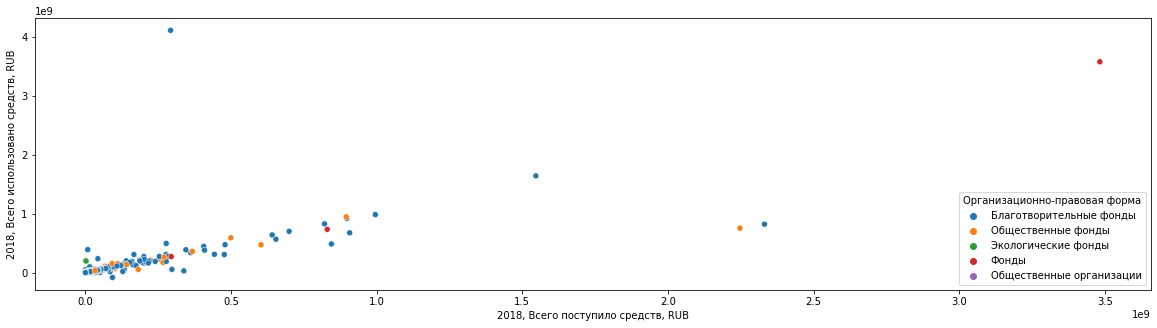

In [53]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
sns.scatterplot(
    x="2018, Всего поступило средств, RUB",
    y="2018, Всего использовано средств, RUB",
    hue="Организационно-правовая форма", 
    data=df);
df["Организационно-правовая форма"].value_counts()